<a href="https://colab.research.google.com/github/Azeezat-git/datascience/blob/main/first_ML/imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imbalanced Dataset - A dataset with an unequal class distribution

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
credit_card_data = pd.read_csv("/content/credit_data.csv")

In [10]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
credit_card_data.shape

(25838, 31)

In [ ]:
credit_card_data.isnull().sum()

<Axes: xlabel='V10', ylabel='Count'>

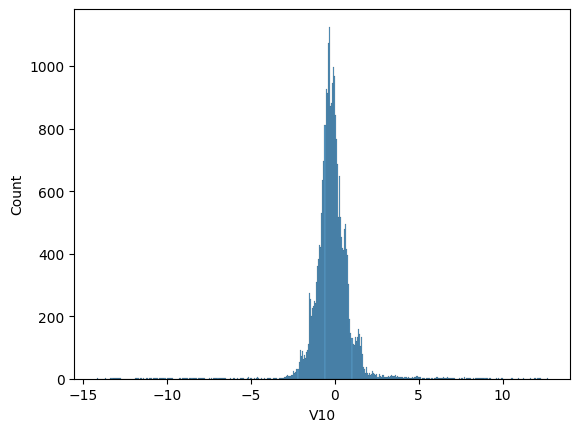

In [15]:
sns.histplot(credit_card_data.V10)

In [16]:
# distribution of the 2 classes
credit_card_data['Class'].value_counts()

Class
0.0    25749
1.0       88
Name: count, dtype: int64

 0 --> label 0 is legit transaction

 1 --> label 1 is fraudulent transaction

 This is an highly imbalanced datatset

In [17]:
# seperating the data (legit and fraudulent)
legit = credit_card_data[credit_card_data.Class == 0.0]
fraud = credit_card_data[credit_card_data.Class == 1.0]

In [18]:
print(legit.shape)
print(fraud.shape)

(25749, 31)
(88, 31)


Under-sampling

Building a sample dataset containing similar distribution of legit and fraudulent transaction.

Number of fraudulent transaction ==> 88

In [24]:
legit_sample = legit.sample(n=88)

In [25]:
legit_sample.shape

(88, 31)

Concatenate the 2 dataframes

In [26]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [27]:
new_dataset.shape

(176, 31)

In [28]:
new_dataset['Class'].value_counts()

Class
0.0    88
1.0    88
Name: count, dtype: int64

In [29]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22792,32435,0.888455,-0.814737,1.016369,0.280636,-0.891949,0.933635,-0.812925,0.491558,0.938310,...,-0.072946,-0.164860,0.050107,-0.226774,-0.091783,0.944170,-0.023819,0.013783,104.70,0.0
25538,33657,1.070767,0.043539,0.477023,1.350052,-0.285526,0.007193,-0.060804,0.159282,0.140440,...,-0.034823,0.017198,-0.056299,0.210528,0.570718,-0.341507,0.027501,0.009265,26.99,0.0
12622,22117,-0.393360,1.142500,1.292933,0.020900,0.500536,0.044166,0.422208,0.157973,0.662327,...,-0.359311,-0.715535,-0.031949,-0.422569,-0.246935,0.066237,0.231580,0.074495,0.99,0.0
22790,32433,-0.419916,-0.275134,0.700811,-2.331038,-0.286157,0.427370,1.613619,-0.431611,0.926464,...,-0.028267,0.176178,-0.161022,-0.822224,0.041274,-0.091614,-0.397972,-0.480752,213.96,0.0
1821,1414,1.199416,-0.126722,0.547421,0.581173,-0.709410,-0.674044,-0.116652,-0.133144,0.691459,...,-0.082700,-0.026305,-0.100437,0.467492,0.535756,0.668711,-0.036332,0.010861,27.83,0.0
